# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.



### Importando as Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importando o DataFrame

In [3]:
# importando e visualizando os dados do DataFrame
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
# Verificando as variáveis (colunas)
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [5]:
# Limpando os dados do DataFrame
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Selecionar apenas as variáveis quantitativas do DataFrame
df_quantitative = df.select_dtypes(include=['int64', 'float64'])

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

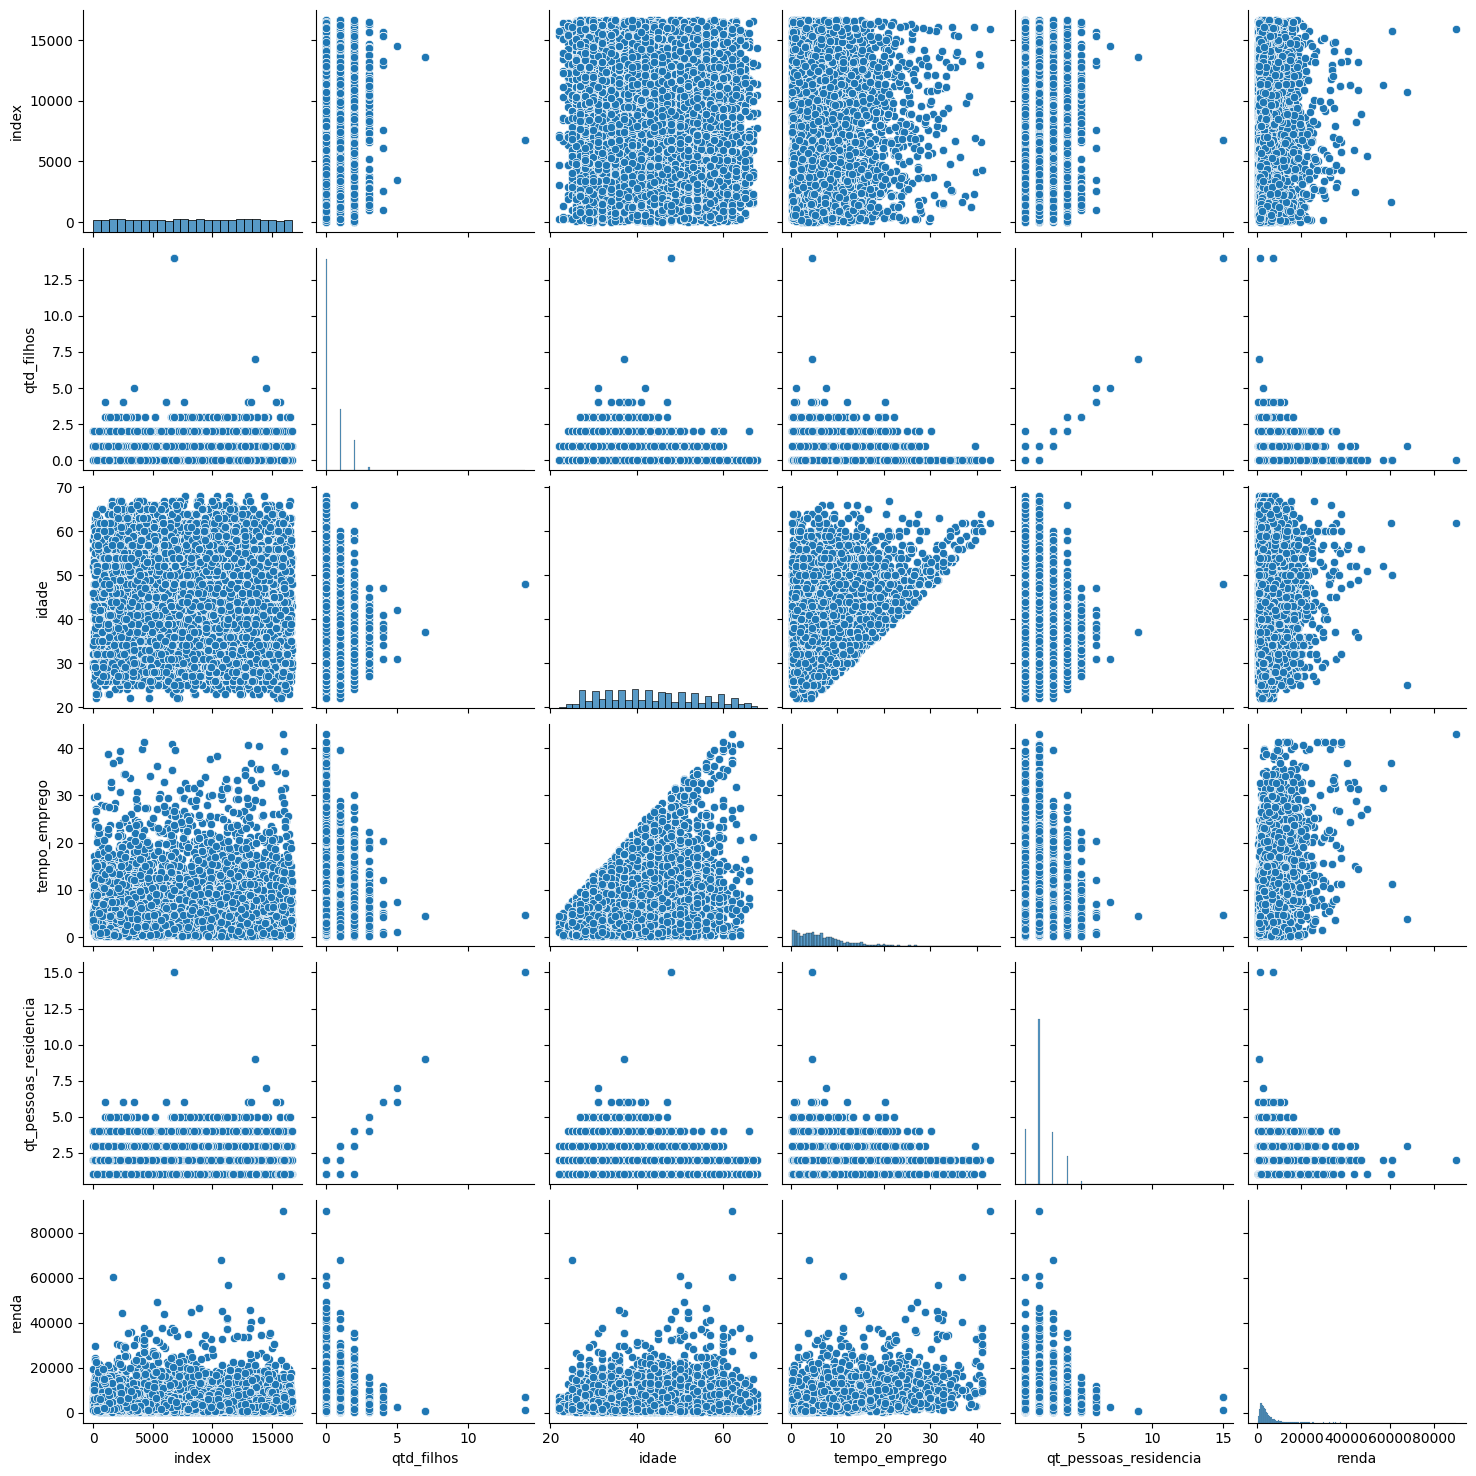

In [7]:
# Gráfico de matriz de dispersão
sns.pairplot(df_quantitative)
plt.show()

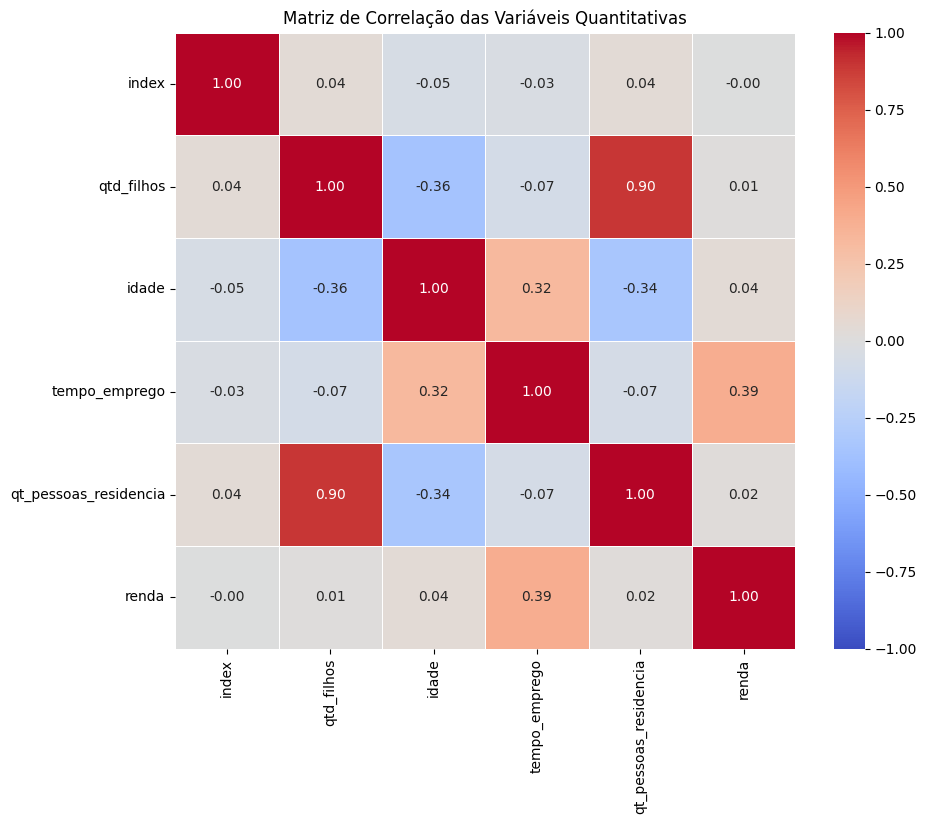

In [12]:
# Matriz de correlação
correlation_matrix = df_quantitative.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1 , vmax=1, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

### Insight 01:

Ao analisar a matriz de correlação fornecida, podemos extrair vários insights sobre as relações entre as variáveis:

1.   Correlações fracas: Observamos que a maioria das correlações entre as variáveis é fraca, com valores próximos de zero. Isso sugere que muitas das variáveis não estão fortemente relacionadas linearmente umas com as outras.

2.   Idade e quantidade de filhos: Existe uma correlação moderada negativa (-0.36) entre a idade e a quantidade de filhos. Isso sugere que, em geral, pessoas mais velhas tendem a ter menos filhos, o que é uma relação intuitiva.

3.   Tempo de emprego e renda: Há uma correlação moderada positiva (0.39) entre o tempo de emprego e a renda. Isso indica que, em geral, pessoas com mais tempo de emprego tendem a ter uma renda mais alta. Isso pode ser devido à progressão na carreira ao longo do tempo.

4.   Quantidade de filhos e quantidade de pessoas na residência: Existe uma forte correlação positiva (0.90) entre a quantidade de filhos e a quantidade de pessoas na residência. Isso é esperado, já que os filhos geralmente aumentam o tamanho médio da família.

5.   Possuir veículo e idade: Há uma correlação fraca negativa (-0.16) entre possuir um veículo e idade. Isso sugere que pessoas mais velhas podem ser menos propensas a possuir um veículo, possivelmente devido a fatores como aposentadoria ou mudança para áreas urbanas onde o transporte público é mais acessível.

6.   Possuir veículo e renda: Existe uma correlação fraca positiva (0.06) entre possuir um veículo e renda. Isso indica uma tendência ligeiramente maior de possuir um veículo entre pessoas com renda mais alta, embora a relação não seja muito forte.

Esses são apenas alguns dos insights que podemos obter da matriz de correlação. Ao interpretar essas correlações, é importante lembrar que correlação não implica causalidade e outras variáveis não consideradas podem influenciar essas relações.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

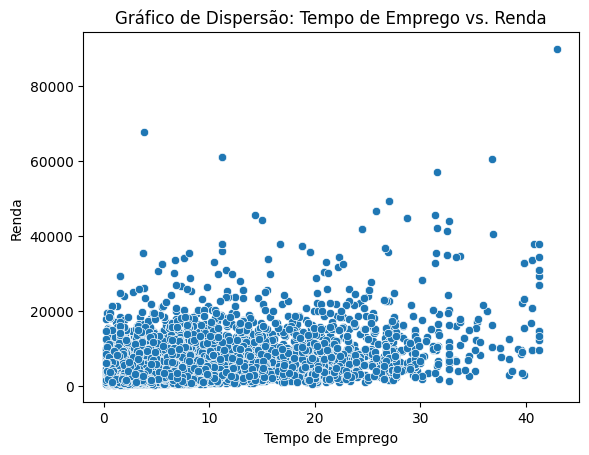

In [8]:
# Selecionar as duas variáveis mais correlacionadas com renda: tempo de emprego e renda
df_subset = df[['tempo_emprego', 'renda']]

# Plotar o scatterplot
sns.scatterplot(data=df_subset, x='tempo_emprego', y='renda')
plt.title('Gráfico de Dispersão: Tempo de Emprego vs. Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.show()


### Insight 02:


Ao analisar o gráfico, podemos observar que aparentemente não há uma relação positiva (crescente) nem negativa (decrescente) clara entre tempo de emprego e renda. Isso sugere uma falta de relação linear direta, com alguns pontos considerados outliers, ou seja, valores que se desviam significativamente do padrão geral dos dados.

De modo geral, o gráfico não contribui significativamente para explicar o fenômeno da relação entre tempo de emprego e renda. No entanto, ao investigar mais a fundo, podemos atribuir variáveis mais específicas para explicar situações adversas ou padrões incomuns que podem ser observados nos dados. Essas variáveis podem incluir fatores como educação, setor de emprego, localização geográfica, entre outros, que podem influenciar a relação entre tempo de emprego e renda.

3) Na sua opinião, há outliers na variável renda?

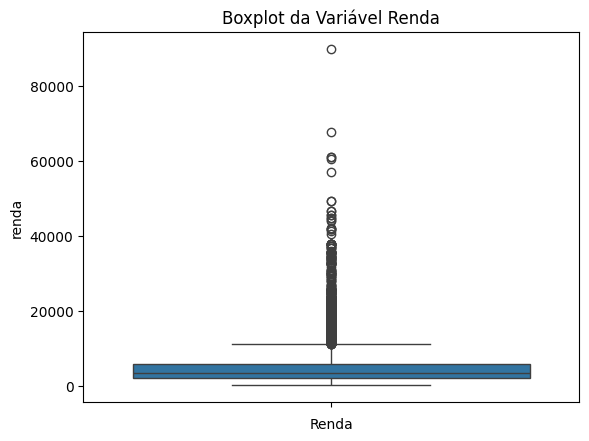

In [9]:
# Plotar o boxplot da variável renda
sns.boxplot(data=df['renda'])
plt.title('Boxplot da Variável Renda')
plt.xlabel('Renda')
plt.show()


### Insight 03:


Ao analisar o gráfico de boxplot da variável Renda, podemos observar a presença de pontos considerados outliers, que estão localizados acima do valor de 20000. Esses pontos sugerem uma dispersão incomum dos dados, indicando uma possível heterogeneidade na amostra ou a presença de diferentes classes sociais dentro do grupo de trabalhadores de renda salarial média.

Essa observação levanta a possibilidade de que existam indivíduos ou famílias com rendas substancialmente mais altas do que a média do grupo, o que pode ser influenciado por fatores como profissão, educação, investimentos, entre outros. Essa heterogeneidade na renda pode ter implicações importantes ao interpretar os resultados de análises estatísticas ou ao realizar inferências sobre a população em estudo.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [12]:
# Calcular o logaritmo da variável renda
df['log_renda'] = np.log(df['renda'])

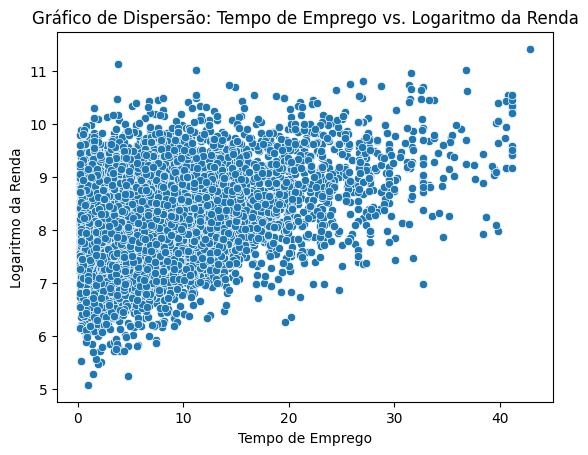

In [13]:
# Gráfico de dispersão com a nova variável de renda
sns.scatterplot(data=df, x='tempo_emprego', y='log_renda')
plt.title('Gráfico de Dispersão: Tempo de Emprego vs. Logaritmo da Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Logaritmo da Renda')
plt.show()

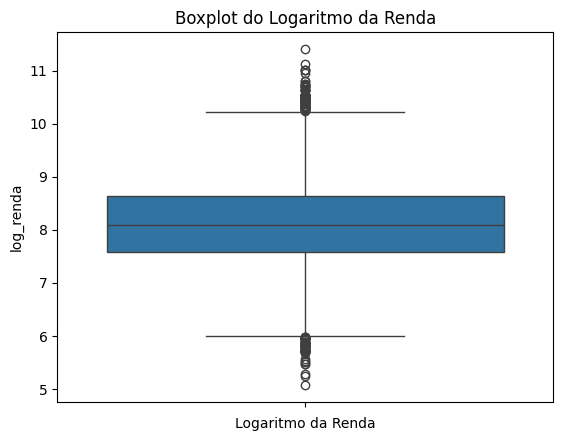

In [14]:
# Boxplot da nova variável de renda
sns.boxplot(data=df['log_renda'])
plt.title('Boxplot do Logaritmo da Renda')
plt.xlabel('Logaritmo da Renda')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

### Insight 04:

Com base nos valores do logaritmo da renda fornecidos, podemos extrair os seguintes insights:

1.   Distribuição mais simétrica: Ao transformar a renda usando o logaritmo, podemos observar que os valores estão mais próximos uns dos outros em comparação com a distribuição original da renda. Isso sugere que a transformação logarítmica pode ter ajudado a reduzir a assimetria nos dados, tornando a distribuição mais simétrica.

2.   Redução na dispersão: Os valores do logaritmo da renda parecem estar mais concentrados em torno de um intervalo menor em comparação com a renda original. Isso indica que a transformação logarítmica pode ter reduzido a dispersão dos dados, o que pode ser útil em análises estatísticas e modelagem.

3.   Padrões de variação mais claros: Com os valores transformados pelo logaritmo, pode ser mais fácil identificar padrões de variação nos dados, já que os valores estão mais uniformemente distribuídos. Isso pode facilitar a identificação de tendências ou relações entre a renda e outras variáveis, como o tempo de emprego ou a idade.

4.   Interpretação dos coeficientes: Ao usar modelos estatísticos que incluem a renda como variável independente, a transformação logarítmica pode facilitar a interpretação dos coeficientes, pois os efeitos das mudanças na renda serão multiplicativos em vez de aditivos. Isso pode resultar em interpretações mais intuitivas e precisas dos resultados do modelo.

